In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

Find the MedTesters!
Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes **health camps** in several cities with **low work life balance**. They reach out to working people and ask them to **register for these health camps**. For those who attend, MedCamp provides them facility to undergo **health checks or increase awareness by visiting various stalls** (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between **“Registration” and Number of people taking tests at the Camps**. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.


The Process:
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.
 

Other things to note:
Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
For a few camps, there was hardware failure, so some information about date and time of registration is lost.
MedCamp runs 3 formats of these camps. **The first and second format provides people with an instantaneous health score**. **The third format provides information about several health issues through various awareness stalls**.
Favorable outcome:
For the first 2 formats, **a favourable outcome is defined as getting a health_score**, **while in the third format it is defined as visiting at least a stall**.
You need to predict the chances (probability) of having a favourable outcome.
 

In [3]:
train = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML_2/Last_Day_Project/Train/Train.csv')
test = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML_2/Last_Day_Project/test_l0Auv8Q.csv')
fhc = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML_2/Last_Day_Project/Train/First_Health_Camp_Attended.csv')
shc = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML_2/Last_Day_Project/Train/Second_Health_Camp_Attended.csv')
thc = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML_2/Last_Day_Project/Train/Third_Health_Camp_Attended.csv')
patient = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML_2/Last_Day_Project/Train/Patient_Profile.csv')
health_camp = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML_2/Last_Day_Project/Train/Health_Camp_Detail.csv')

we will combine the train and test and then map all the remaining data with combined data 

In [5]:
combined = pd.concat([train,test],ignore_index=True)
train.shape,test.shape,combined.shape

((75278, 8), (35249, 8), (110527, 8))

In [6]:
combined.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')

In [7]:
patient.columns

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')

In [8]:
# Patient Data

In [9]:
combined = pd.merge(combined, patient, on=['Patient_ID'],how='left')

In [10]:
fhc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',
       'Unnamed: 4'],
      dtype='object')

In [11]:

combined = pd.merge(combined, fhc, on=['Patient_ID','Health_Camp_ID'],how='left')
# Second Health Camp 
combined = pd.merge(combined, shc, on=['Patient_ID','Health_Camp_ID'],how='left')    
# Third Health Camp 
combined = pd.merge(combined, thc, on=['Patient_ID','Health_Camp_ID'],how='left')
# Health Camp 
combined = pd.merge(combined, health_camp, on=['Health_Camp_ID'],how='left')

In [12]:
# Shape of the data after all combined
combined.shape

(110527, 29)

In [13]:
del health_camp, fhc, shc, thc, patient

In [14]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,...,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,...,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,...,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,...,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,...,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [15]:
pd.set_option('display.max_columns', 50)

In [16]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [17]:
# Registration Data, First Interation , Camp_Start_Date, Camp_End_Date

In [18]:
combined.dtypes

Patient_ID                     int64
Health_Camp_ID                 int64
Registration_Date             object
Var1                           int64
Var2                           int64
Var3                           int64
Var4                           int64
Var5                           int64
Online_Follower                int64
LinkedIn_Shared                int64
Twitter_Shared                 int64
Facebook_Shared                int64
Income                       float64
Education_Score              float64
Age                          float64
First_Interaction             object
City_Type                     object
Employer_Category             object
Donation                     float64
Health_Score                 float64
Unnamed: 4                   float64
Health Score                 float64
Number_of_stall_visited      float64
Last_Stall_Visited_Number    float64
Camp_Start_Date               object
Camp_End_Date                 object
Category1                     object
C

In [19]:
combined['Registration_Date'] = pd.to_datetime(combined.Registration_Date,dayfirst=True)
combined['First_Interaction'] = pd.to_datetime(combined.First_Interaction,dayfirst=True)
combined['Camp_Start_Date'] = pd.to_datetime(combined.Camp_Start_Date,dayfirst=True)
combined['Camp_End_Date'] = pd.to_datetime(combined.Camp_End_Date,dayfirst=True)

In [20]:
combined.dtypes

Patient_ID                            int64
Health_Camp_ID                        int64
Registration_Date            datetime64[ns]
Var1                                  int64
Var2                                  int64
Var3                                  int64
Var4                                  int64
Var5                                  int64
Online_Follower                       int64
LinkedIn_Shared                       int64
Twitter_Shared                        int64
Facebook_Shared                       int64
Income                              float64
Education_Score                     float64
Age                                 float64
First_Interaction            datetime64[ns]
City_Type                            object
Employer_Category                    object
Donation                            float64
Health_Score                        float64
Unnamed: 4                          float64
Health Score                        float64
Number_of_stall_visited         

In [21]:
# Registration vs First Interaction 

combined['Interaction_Days'] = combined['Registration_Date'] - combined['First_Interaction']
combined['Interaction_Days'] = combined['Interaction_Days'].dt.days
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0


In [22]:
# Camp Duration 
combined['Camp_Duration'] = (combined['Camp_End_Date'] - combined['Camp_Start_Date']).dt.days
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4


In [23]:
# Registration Date Vs Camp Start Date 
combined['Magic1'] = (combined['Camp_Start_Date'] - combined['Registration_Date']).dt.days
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0


In [24]:
# Registration Vs Camp End date 
combined['Active_Connect'] = (combined['Camp_End_Date'] - combined['First_Interaction']).dt.days
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0,1233
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0,11
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,1004


In [25]:
# First Interaction Vs Camp start date 
combined['Waiting_Period'] = (combined['Camp_Start_Date'] - combined['First_Interaction']).dt.days
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312,253
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401,342
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0,1233,482
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0,11,-6
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,1004,1000


In [26]:
# Camp End date vs Registration Dates 
combined['Magic2'] = (combined['Camp_End_Date'] - combined['Registration_Date']).dt.days
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312,253,34.0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401,342,57.0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0,1233,482,557.0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0,11,-6,11.0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,1004,1000,34.0


In [27]:
# Combined Online Activity 
combined['Digital_Marketing'] = combined['Online_Follower'] + combined['Twitter_Shared'] + combined['Facebook_Shared'] + combined['LinkedIn_Shared']
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312,253,34.0,0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401,342,57.0,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0,1233,482,557.0,0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0,11,-6,11.0,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,1004,1000,34.0,1


In [28]:
# Dropping the social media features
combined.drop(['Online_Follower','Twitter_Shared','Facebook_Shared','LinkedIn_Shared'],axis=1, inplace=True)

In [29]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312,253,34.0,0
1,507246,6578,2005-08-18,45,5,0,0,7,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401,342,57.0,0
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0,1233,482,557.0,0
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0,11,-6,11.0,0
4,521364,6529,2006-02-28,15,1,0,0,7,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,1004,1000,34.0,1


Process: First interaction happens then the patient regierts for the health camp

He is informed about the camp start date and End date 

Camp End date > Camp Start > Regn Date

In [31]:
def sequence(regn,start,end):
    if (end>start>regn):
        return 1
    else:
        return 0

In [32]:
combined['comm_seq'] = combined.apply(lambda x:sequence(x['Registration_Date'],x['Camp_Start_Date'],x['Camp_End_Date']),axis=1)

In [33]:
combined.comm_seq.value_counts(normalize=True)

comm_seq
0    0.586282
1    0.413718
Name: proportion, dtype: float64

In [34]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312,253,34.0,0,0
1,507246,6578,2005-08-18,45,5,0,0,7,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401,342,57.0,0,0
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0,1233,482,557.0,0,0
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0,11,-6,11.0,0,0
4,521364,6529,2006-02-28,15,1,0,0,7,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,1004,1000,34.0,1,1


In [35]:
# Registration Date 
combined['Regn_Days'] = combined.Registration_Date.dt.day
combined['Regn_Month'] = combined.Registration_Date.dt.month
combined['Regn_Year'] = combined.Registration_Date.dt.year

# How many Patients?
. How many Patients registered every day/ month and year 

. How many health camps have been organized this year/month 

In [37]:
# How many Patients registered every month 

combined['PerMonth_Regn'] = combined.groupby('Regn_Month')['Patient_ID'].transform('nunique')
combined['PerYear_Regn'] = combined.groupby('Regn_Year')['Patient_ID'].transform('nunique')
combined['PerDay_Regn'] = combined.groupby('Regn_Days')['Patient_ID'].transform('nunique')

In [38]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq,Regn_Days,Regn_Month,Regn_Year,PerMonth_Regn,PerYear_Regn,PerDay_Regn
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,-25.0,312,253,34.0,0,0,10.0,9.0,2005.0,6585.0,15710.0,2649.0
1,507246,6578,2005-08-18,45,5,0,0,7,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,-2.0,401,342,57.0,0,0,18.0,8.0,2005.0,5804.0,15710.0,3620.0
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,-194.0,1233,482,557.0,0,0,29.0,4.0,2006.0,4785.0,19318.0,2518.0
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,-6.0,11,-6,11.0,0,0,7.0,2.0,2004.0,5029.0,9646.0,2363.0
4,521364,6529,2006-02-28,15,1,0,0,7,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,1004,1000,34.0,1,1,28.0,2.0,2006.0,5029.0,19318.0,3012.0


In [39]:
# Camp Start Date 
combined['CS_Days'] = combined.Camp_Start_Date.dt.day
combined['CS_Month'] = combined.Camp_Start_Date.dt.month
combined['CS_Year'] = combined.Camp_Start_Date.dt.year

In [40]:
# Camp End Date
combined['CS_EDays'] = combined.Camp_End_Date.dt.day
combined['CS_EMonth'] = combined.Camp_End_Date.dt.month
combined['CS_EYear'] = combined.Camp_End_Date.dt.year

In [41]:
# How many helath camps are organised in the Begnning of the Date,Month and Year

In [42]:
# Camp organizsed in year/month

# Health camp id

combined['HC_PM'] = combined.groupby('CS_Month')['Patient_ID'].transform('nunique')
combined['HC_PY'] = combined.groupby('CS_Year')['Patient_ID'].transform('nunique')
combined['HC_PD'] = combined.groupby('CS_Days')['Patient_ID'].transform('nunique')


combined['HC_EM'] = combined.groupby('CS_EMonth')['Patient_ID'].transform('nunique')
combined['HC_EY'] = combined.groupby('CS_EYear')['Patient_ID'].transform('nunique')
combined['HC_ED'] = combined.groupby('CS_EDays')['Patient_ID'].transform('nunique')

In [43]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,...,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq,Regn_Days,Regn_Month,Regn_Year,PerMonth_Regn,PerYear_Regn,PerDay_Regn,CS_Days,CS_Month,CS_Year,CS_EDays,CS_EMonth,CS_EYear,HC_PM,HC_PY,HC_PD,HC_EM,HC_EY,HC_ED
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,...,59,-25.0,312,253,34.0,0,0,10.0,9.0,2005.0,6585.0,15710.0,2649.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152
1,507246,6578,2005-08-18,45,5,0,0,7,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,...,59,-2.0,401,342,57.0,0,0,18.0,8.0,2005.0,5804.0,15710.0,3620.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,...,751,-194.0,1233,482,557.0,0,0,29.0,4.0,2006.0,4785.0,19318.0,2518.0,17,10,2005,7,11,2007,8242,22359,4722,14643,14379,12644
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,...,17,-6.0,11,-6,11.0,0,0,7.0,2.0,2004.0,5029.0,9646.0,2363.0,1,2,2004,18,2,2004,8717,10902,4423,11010,6319,10755
4,521364,6529,2006-02-28,15,1,0,0,7,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,...,4,30.0,1004,1000,34.0,1,1,28.0,2.0,2006.0,5029.0,19318.0,3012.0,30,3,2006,3,4,2006,3823,16175,5955,6519,14842,3823


In [44]:
# How many health camps were organised for every patient ie count of Health Camps 
# How many patients appeared in the healthcamp

In [45]:
combined['Patients_in_HC'] = combined.groupby('Health_Camp_ID')['Patient_ID'].transform('nunique')
combined['HC_For_Patients'] = combined.groupby('Patient_ID')['Health_Camp_ID'].transform('nunique')

In [46]:
combined['HCC_For_Patients'] = combined.groupby('Patient_ID')['Health_Camp_ID'].transform('count')

a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
### Creation of Target Variable

In [48]:
def target(hs,hs_,stall_visit,last_stall_visited):
    if(hs>0 or hs_>0 or stall_visit>0 or last_stall_visited>0):
        return 1
    else:
        return 0

In [49]:
combined["Target"] = combined.apply(lambda x:target(x["Health_Score"],x["Health Score"],x["Number_of_stall_visited"],x["Last_Stall_Visited_Number"]),axis=1)

In [50]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,...,Magic2,Digital_Marketing,comm_seq,Regn_Days,Regn_Month,Regn_Year,PerMonth_Regn,PerYear_Regn,PerDay_Regn,CS_Days,CS_Month,CS_Year,CS_EDays,CS_EMonth,CS_EYear,HC_PM,HC_PY,HC_PD,HC_EM,HC_EY,HC_ED,Patients_in_HC,HC_For_Patients,HCC_For_Patients,Target
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,...,34.0,0,0,10.0,9.0,2005.0,6585.0,15710.0,2649.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152,2837,11,11,1
1,507246,6578,2005-08-18,45,5,0,0,7,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,...,57.0,0,0,18.0,8.0,2005.0,5804.0,15710.0,3620.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152,2837,26,26,0
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,...,557.0,0,0,29.0,4.0,2006.0,4785.0,19318.0,2518.0,17,10,2005,7,11,2007,8242,22359,4722,14643,14379,12644,3597,7,7,1
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,...,11.0,0,0,7.0,2.0,2004.0,5029.0,9646.0,2363.0,1,2,2004,18,2,2004,8717,10902,4423,11010,6319,10755,1882,6,6,0
4,521364,6529,2006-02-28,15,1,0,0,7,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,...,34.0,1,1,28.0,2.0,2006.0,5029.0,19318.0,3012.0,30,3,2006,3,4,2006,3823,16175,5955,6519,14842,3823,3823,23,23,1


In [51]:
new = combined.drop(['Health_Score','Unnamed: 4','Health Score','Number_of_stall_visited',
       'Last_Stall_Visited_Number', 'Camp_Start_Date', 'Camp_End_Date','Registration_Date','First_Interaction'],axis=1)

In [52]:
new.shape

(110527, 46)

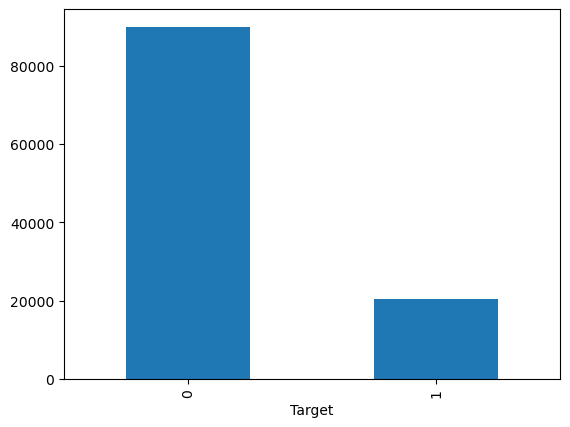

In [53]:
new.Target.value_counts().plot(kind='bar')
plt.show()

In [54]:
new.head()

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq,Regn_Days,Regn_Month,Regn_Year,PerMonth_Regn,PerYear_Regn,PerDay_Regn,CS_Days,CS_Month,CS_Year,CS_EDays,CS_EMonth,CS_EYear,HC_PM,HC_PY,HC_PD,HC_EM,HC_EY,HC_ED,Patients_in_HC,HC_For_Patients,HCC_For_Patients,Target
0,489652,6578,4,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,Third,G,2,278.0,59,-25.0,312,253,34.0,0,0,10.0,9.0,2005.0,6585.0,15710.0,2649.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152,2837,11,11,1
1,507246,6578,45,5,0,0,7,1.0,75.0,40.0,C,Others,NaN,Third,G,2,344.0,59,-2.0,401,342,57.0,0,0,18.0,8.0,2005.0,5804.0,15710.0,3620.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152,2837,26,26,0
2,523729,6534,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Second,A,2,676.0,751,-194.0,1233,482,557.0,0,0,29.0,4.0,2006.0,4785.0,19318.0,2518.0,17,10,2005,7,11,2007,8242,22359,4722,14643,14379,12644,3597,7,7,1
3,524931,6535,0,0,0,0,0,NaN,NaN,NaN,I,NaN,NaN,First,E,2,0.0,17,-6.0,11,-6,11.0,0,0,7.0,2.0,2004.0,5029.0,9646.0,2363.0,1,2,2004,18,2,2004,8717,10902,4423,11010,6319,10755,1882,6,6,0
4,521364,6529,15,1,0,0,7,1.0,70.0,40.0,I,Technology,NaN,Second,A,2,970.0,4,30.0,1004,1000,34.0,1,1,28.0,2.0,2006.0,5029.0,19318.0,3012.0,30,3,2006,3,4,2006,3823,16175,5955,6519,14842,3823,3823,23,23,1


In [55]:
# Check if there is any relation between Categories and target 
import scipy.stats as stats
cats = ['Category1','Category2','Category3']

for i in cats:
    tb1 = pd.crosstab(new.loc[:,i],new.Target)
    teststats,pvalue,dof,exp = stats.chi2_contingency(tb1)
    print(f'{i} : pvalue = {pvalue}')

Category1 : pvalue = 0.0
Category2 : pvalue = 0.0
Category3 : pvalue = 0.0003699935082811573


In [56]:
# Health Camps as per Category 2
new['Magic3'] = new.groupby('Category2')['Health_Camp_ID'].transform('nunique')
new['Magic4'] = new.groupby('Category1')['Health_Camp_ID'].transform('nunique')
new['Magic5'] = new.groupby('Category3')['Health_Camp_ID'].transform('nunique')

# Patients...

new["Magic6"] = new.groupby("Category2")["Patient_ID"].transform("nunique")
new["Magic7"] = new.groupby("Category3")["Patient_ID"].transform("nunique")
new["Magic8"] = new.groupby("Category1")["Patient_ID"].transform("nunique")

In [57]:
# Deal with Categories 

new['Category1'] = pd.factorize(new.Category1)[0]
new['Category2'] = pd.factorize(new.Category2)[0]
new['Category3'] = pd.factorize(new.Category3)[0]

In [58]:
# Check Variables 1 to 5
cats = ['Var1','Var2','Var3','Var4','Var5']

for i in cats:
    tb1 = pd.crosstab(new.loc[:,i],new.Target)
    teststats,pvalue,dof,exp = stats.chi2_contingency(tb1)
    print(f'{i} : pvalue = {pvalue}')

Var1 : pvalue = 6.838846288318903e-53
Var2 : pvalue = 3.787050514205907e-32
Var3 : pvalue = 0.006578836766342621
Var4 : pvalue = 0.012219232918294775
Var5 : pvalue = 2.7350892211054794e-63


In [59]:
# We can not drop these variables 

In [60]:
# Convert negative in to Postive Days 
new['Magic1'] = np.abs(new['Magic1'])
new['Waiting_Period'] = np.abs(new['Waiting_Period'])

In [61]:
new.Income.describe()

count    29185.000000
mean         1.224259
std          1.378326
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Income, dtype: float64

In [62]:
def incomeCat(x):
  if x:
    return(1)
  else:
    return(0)

In [63]:
new['Income_Cat'] = new.Income.apply(incomeCat)

In [64]:
tb1 = pd.crosstab(new.Income_Cat,new.Target)
teststats,pvalue,dof,exp = stats.chi2_contingency(tb1)
print(f'pvalue = {pvalue}')

pvalue = 1.648563683355864e-32


In [65]:
new.Income.fillna(new.Income.median(),inplace=True)

In [66]:
new.head()

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq,Regn_Days,...,PerYear_Regn,PerDay_Regn,CS_Days,CS_Month,CS_Year,CS_EDays,CS_EMonth,CS_EYear,HC_PM,HC_PY,HC_PD,HC_EM,HC_EY,HC_ED,Patients_in_HC,HC_For_Patients,HCC_For_Patients,Target,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Income_Cat
0,489652,6578,4,0,0,0,2,1.0,NaN,NaN,NaN,NaN,NaN,0,0,0,278.0,59,25.0,312,253,34.0,0,0,10.0,...,15710.0,2649.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152,2837,11,11,1,10,10,62,13614,36527,13614,1
1,507246,6578,45,5,0,0,7,1.0,75.0,40.0,C,Others,NaN,0,0,0,344.0,59,2.0,401,342,57.0,0,0,18.0,...,15710.0,3620.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152,2837,26,26,0,10,10,62,13614,36527,13614,1
2,523729,6534,0,0,0,0,0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,0,676.0,751,194.0,1233,482,557.0,0,0,29.0,...,19318.0,2518.0,17,10,2005,7,11,2007,8242,22359,4722,14643,14379,12644,3597,7,7,1,7,11,62,11415,36527,15426,1
3,524931,6535,0,0,0,0,0,1.0,NaN,NaN,I,NaN,NaN,2,2,0,0.0,17,6.0,11,6,11.0,0,0,7.0,...,9646.0,2363.0,1,2,2004,18,2,2004,8717,10902,4423,11010,6319,10755,1882,6,6,0,15,44,62,15397,36527,27282,1
4,521364,6529,15,1,0,0,7,1.0,70.0,40.0,I,Technology,NaN,1,1,0,970.0,4,30.0,1004,1000,34.0,1,1,28.0,...,19318.0,3012.0,30,3,2006,3,4,2006,3823,16175,5955,6519,14842,3823,3823,23,23,1,7,11,62,11415,36527,15426,1


In [67]:
tb1 = pd.crosstab(new.Income,new.Target)
teststats,pvalue,dof,exp = stats.chi2_contingency(tb1)
print(f'pvalue = {pvalue}')

pvalue = 3.953425939987871e-153


In [68]:
# Employeer Category 
new.Employer_Category.unique()

array([nan, 'Others', 'Technology', 'Consulting', 'Software Industry',
       'Manufacturing', 'Education', 'Health', 'Retail', 'BFSI',
       'Transport', 'Broadcasting', 'Telecom', 'Real Estate', 'Food'],
      dtype=object)

In [69]:
# Employeer Category 
new['Employer_Category'] = pd.factorize(new.Employer_Category)[0]
new['City_Type'] = pd.factorize(new.City_Type)[0]
new['Education_Score'] = pd.factorize(new.Education_Score)[0]

In [70]:
new.Age.describe()

count    32602.000000
mean        48.208760
std         11.969104
min         30.000000
25%         40.000000
50%         44.000000
75%         51.000000
max         80.000000
Name: Age, dtype: float64

In [71]:
new.Age.fillna(new.Age.median(),inplace=True)

In [72]:
new.head() # Donation, Regn_Days, Regn_Month, Regn_Year, 'CS_Days','CS_Month',CS_Year,CS_EDays,CS_EMonth, CS_EYear, Patient_ID, Health_Camp_ID

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq,Regn_Days,...,PerYear_Regn,PerDay_Regn,CS_Days,CS_Month,CS_Year,CS_EDays,CS_EMonth,CS_EYear,HC_PM,HC_PY,HC_PD,HC_EM,HC_EY,HC_ED,Patients_in_HC,HC_For_Patients,HCC_For_Patients,Target,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Income_Cat
0,489652,6578,4,0,0,0,2,1.0,-1,44.0,-1,-1,NaN,0,0,0,278.0,59,25.0,312,253,34.0,0,0,10.0,...,15710.0,2649.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152,2837,11,11,1,10,10,62,13614,36527,13614,1
1,507246,6578,45,5,0,0,7,1.0,0,40.0,0,0,NaN,0,0,0,344.0,59,2.0,401,342,57.0,0,0,18.0,...,15710.0,3620.0,16,8,2005,14,10,2005,10445,22359,3134,6109,17330,3152,2837,26,26,0,10,10,62,13614,36527,13614,1
2,523729,6534,0,0,0,0,0,1.0,-1,44.0,-1,-1,NaN,1,1,0,676.0,751,194.0,1233,482,557.0,0,0,29.0,...,19318.0,2518.0,17,10,2005,7,11,2007,8242,22359,4722,14643,14379,12644,3597,7,7,1,7,11,62,11415,36527,15426,1
3,524931,6535,0,0,0,0,0,1.0,-1,44.0,1,-1,NaN,2,2,0,0.0,17,6.0,11,6,11.0,0,0,7.0,...,9646.0,2363.0,1,2,2004,18,2,2004,8717,10902,4423,11010,6319,10755,1882,6,6,0,15,44,62,15397,36527,27282,1
4,521364,6529,15,1,0,0,7,1.0,1,40.0,1,1,NaN,1,1,0,970.0,4,30.0,1004,1000,34.0,1,1,28.0,...,19318.0,3012.0,30,3,2006,3,4,2006,3823,16175,5955,6519,14842,3823,3823,23,23,1,7,11,62,11415,36527,15426,1


In [73]:
# Dropping the columns 

In [74]:
#Dropping the Columns which are not needed
new.drop(["Donation","Regn_Days","Regn_Month","Regn_Year","CS_Days","CS_Month","CS_Year","CS_EDays","CS_EMonth","CS_EYear","Patient_ID","Health_Camp_ID"], axis=1, inplace=True)

In [75]:
new.shape

(110527, 41)

In [76]:
new.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Income', 'Education_Score',
       'Age', 'City_Type', 'Employer_Category', 'Category1', 'Category2',
       'Category3', 'Interaction_Days', 'Camp_Duration', 'Magic1',
       'Active_Connect', 'Waiting_Period', 'Magic2', 'Digital_Marketing',
       'comm_seq', 'PerMonth_Regn', 'PerYear_Regn', 'PerDay_Regn', 'HC_PM',
       'HC_PY', 'HC_PD', 'HC_EM', 'HC_EY', 'HC_ED', 'Patients_in_HC',
       'HC_For_Patients', 'HCC_For_Patients', 'Target', 'Magic3', 'Magic4',
       'Magic5', 'Magic6', 'Magic7', 'Magic8', 'Income_Cat'],
      dtype='object')

In [77]:
new.isnull().sum()[new.isnull().sum()!=0].index

Index(['Interaction_Days', 'Magic1', 'Magic2', 'PerMonth_Regn', 'PerYear_Regn',
       'PerDay_Regn'],
      dtype='object')

In [78]:
missed = ['Interaction_Days', 'Magic1', 'Magic2', 'PerMonth_Regn', 'PerYear_Regn','PerDay_Regn']
          
for i in missed:
          new[i].fillna(new[i].median(),inplace=True)

In [79]:
# Modelling 

In [80]:
newtrain = new.loc[0:train.shape[0]-1,:]
newtest = new.loc[train.shape[0]:,:]

newtest.drop('Target',axis = 1, inplace = True)
newtrain.shape,newtest.shape,train.shape,test.shape

((75278, 41), (35249, 40), (75278, 8), (35249, 8))

In [81]:
newtrain

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Interaction_Days,Camp_Duration,Magic1,Active_Connect,Waiting_Period,Magic2,Digital_Marketing,comm_seq,PerMonth_Regn,PerYear_Regn,PerDay_Regn,HC_PM,HC_PY,HC_PD,HC_EM,HC_EY,HC_ED,Patients_in_HC,HC_For_Patients,HCC_For_Patients,Target,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Income_Cat
0,4,0,0,0,2,1.0,-1,44.0,-1,-1,0,0,0,278.0,59,25.0,312,253,34.0,0,0,6585.0,15710.0,2649.0,10445,22359,3134,6109,17330,3152,2837,11,11,1,10,10,62,13614,36527,13614,1
1,45,5,0,0,7,1.0,0,40.0,0,0,0,0,0,344.0,59,2.0,401,342,57.0,0,0,5804.0,15710.0,3620.0,10445,22359,3134,6109,17330,3152,2837,26,26,0,10,10,62,13614,36527,13614,1
2,0,0,0,0,0,1.0,-1,44.0,-1,-1,1,1,0,676.0,751,194.0,1233,482,557.0,0,0,4785.0,19318.0,2518.0,8242,22359,4722,14643,14379,12644,3597,7,7,1,7,11,62,11415,36527,15426,1
3,0,0,0,0,0,1.0,-1,44.0,1,-1,2,2,0,0.0,17,6.0,11,6,11.0,0,0,5029.0,9646.0,2363.0,8717,10902,4423,11010,6319,10755,1882,6,6,0,15,44,62,15397,36527,27282,1
4,15,1,0,0,7,1.0,1,40.0,1,1,1,1,0,970.0,4,30.0,1004,1000,34.0,1,1,5029.0,19318.0,3012.0,3823,16175,5955,6519,14842,3823,3823,23,23,1,7,11,62,11415,36527,15426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,0,0,0,0,0,1.0,-1,44.0,-1,-1,2,3,0,142.0,189,149.0,182,7,40.0,0,0,6755.0,15710.0,3149.0,10445,10902,3176,11010,17330,4301,1992,8,8,0,11,44,62,16997,36527,27282,1
75274,0,0,0,0,0,3.0,25,51.0,1,12,0,0,0,519.0,74,3.0,590,516,71.0,3,0,5029.0,19318.0,2610.0,8717,16175,1744,6519,14842,4817,1744,33,33,1,10,10,62,13614,36527,13614,1
75275,0,0,0,0,0,1.0,37,37.0,6,3,2,5,0,13.0,12,26.0,51,39,38.0,0,1,6117.0,15710.0,3126.0,8208,22359,7325,7155,17330,2303,2303,7,7,1,2,44,62,2391,36527,27282,1
75276,0,0,0,0,0,3.0,22,44.0,5,1,2,2,0,89.0,15,0.0,104,89,15.0,0,0,6196.0,9646.0,2438.0,6774,10902,6381,5293,17330,3517,3517,14,14,0,15,44,62,15397,36527,27282,1


In [82]:
# SMOTE
x = newtrain.drop('Target', axis = 1)
y = newtrain.Target
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state = 0)
smote_x, smote_y = smote.fit_resample(x,y)

In [83]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

dtree = DecisionTreeClassifier(random_state=0)
tree_pred = []

for train_index,test_index in kfold.split(smote_x,smote_y):
    X_train = smote_x.iloc[train_index]
    y_train = smote_y.iloc[train_index]
    tree_pred.append(dtree.fit(X_train,y_train).predict_proba(newtest))
    

In [84]:
pd.DataFrame(np.array([tree_pred][0])[1])

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
35244,1.0,0.0
35245,1.0,0.0
35246,1.0,0.0
35247,1.0,0.0


In [85]:
# from sklearn.ensemble import StackingClassifier

# # Define base learners as a list of tuples
# base_learners = [
#     ('Dtree', DecisionTreeClassifier(random_state=0)),
#     ('RF', RandomForestClassifier(random_state=0)),
#     ('GBM', GradientBoostingClassifier(random_state=0)),
#     ('XG', XGBClassifier(random_state=0))
# ]

# # Initialize empty list for predictions
# tree_pred = []

# # Define the Meta Model
# meta_model = LGBMClassifier(random_state=0)

# # Define the Stacking Model
# stack = StackingClassifier(
#     estimators=base_learners,
#     final_estimator=meta_model,
#     cv=5)

# # Train and predict
# for train_index, test_index in kfold.split(smote_x, smote_y):
#     x_train = smote_x.iloc[train_index]
#     y_train = smote_y.iloc[train_index]
#     tree_pred.append(stack.fit(x_train, y_train).predict_proba(newtest))

# submission["Outcome"] = pd.DataFrame(np.array(tree_pred[0]))[1]
# submission.to_csv("Stack.csv", index=False)

In [86]:
from sklearn.ensemble import StackingClassifier

#Define base learners as a list of tuples
base_learners = [
    ('RF', RandomForestClassifier(random_state=0)),
    ('GBM', GradientBoostingClassifier(random_state=0)),
    ('XG', XGBClassifier(random_state=0))
]

# Initialize empty list for predictions
stack_pred = []

# Define the Meta Model
meta_model = LGBMClassifier(random_state=0)

# Define the Stacking Model
stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5)

# Train and predict
for train_index, test_index in kfold.split(smote_x, smote_y):
    x_train = smote_x.iloc[train_index]
    y_train = smote_y.iloc[train_index]
    stack_pred.append(stack.fit(x_train, y_train).predict_proba(newtest))

[LightGBM] [Info] Number of positive: 43795, number of negative: 43795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 87590, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 43795, number of negative: 43795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 87590, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

In [87]:
#pip show scikit-learn

In [88]:
#pip show xgboost

In [89]:
#pip show scikit-learn xgboost lightgbm

In [90]:
#pip install lightgbm